[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mahdidi/Titanic-Survival.git/blob/main/titan.ipynb)
[![Open In Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/mahdidi/Titanic-Survival.git/blob/main/titan.ipynb)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [8]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

In [ ]:

train_df = pd.read_csv( "train.csv")
test_df = pd.read_csv("test.csv")

train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')

def preprocess_data(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le


X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df  
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# ایجاد نمونه‌های بوت‌استرپ
n_samples = 5  # تعداد نمونه‌های بوت‌استرپ
bootstrap_samples = []

for i in range(n_samples):
    sample = train_df.sample(n=len(train_df), replace=True, random_state=42 + i)
    bootstrap_samples.append(sample)

# تعریف مدل‌های weak learners
weak_learners = []
models = [XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss"),
          DecisionTreeClassifier(),
          RandomForestClassifier(n_estimators=100),
          XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss"),
          XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric="logloss")]

for i, sample in enumerate(bootstrap_samples):
    X_sample = sample.drop(columns=["Survived"])
    y_sample = sample["Survived"]
    model = models[i]
    model.fit(X_sample, y_sample)
    weak_learners.append((f'model_{i+1}', model))

# ایجاد strong learner با VotingClassifier
strong_learner = VotingClassifier(estimators=weak_learners, voting='hard')
strong_learner.fit(X_train_split, y_train_split)

y_val_pred = strong_learner.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)



C:\Users\DELL\AppData\Local\Temp\ipykernel_2936\3817139636.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2936\3817139636.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Validation Accuracy: 0.7877094972067039


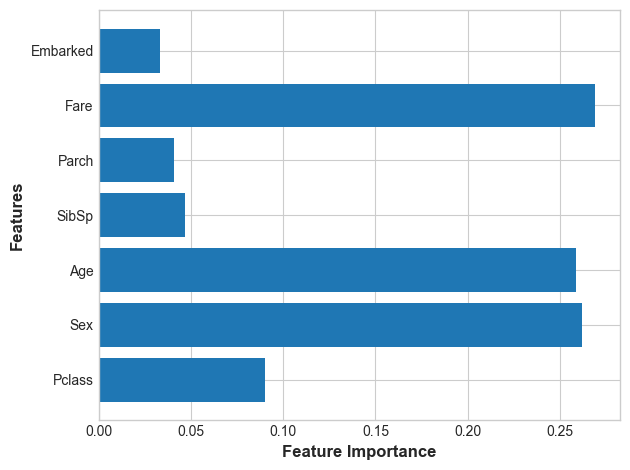

In [26]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

plt.barh(X_train.columns, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[100, 200, 400, 500]
   
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'n_estimators': 200}


In [ ]:
train_df = pd.read_csv( "train.csv")
test_df = pd.read_csv("test.csv")

train_df = train_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
test_df = test_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors='ignore')

def preprocess_data(df):
    df["Age"].fillna(df["Age"].median(), inplace=True)
    df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
    return df

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)

label_encoders = {}
for col in ["Sex", "Embarked"]:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    if col in test_df.columns:
        test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

X_train = train_df.drop(columns=["Survived"])
y_train = train_df["Survived"]
X_test = test_df  
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# ایجاد نمونه‌های بوت‌استرپ
n_samples = 7  # تعداد نمونه‌های بوت‌استرپ
bootstrap_samples = []

for i in range(n_samples):
    sample = train_df.sample(n=len(train_df), replace=True, random_state=42 + i)
    bootstrap_samples.append(sample)

# تعریف مدل‌های weak learners
weak_learners = []
models = [
    XGBClassifier(n_estimators=500, use_label_encoder=False, eval_metric="logloss"),
    DecisionTreeClassifier(min_samples_split=5, max_depth=10),
    RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=2),
    SVC(probability=True),  # اضافه کردن SVM
    LogisticRegression(),   # اضافه کردن رگرسیون لجستیک
    ExtraTreesClassifier(n_estimators=100),  # جایگزین LightGBM با Extra Trees
    KNeighborsClassifier(n_neighbors=5)
]

for i, sample in enumerate(bootstrap_samples):
    X_sample = sample.drop(columns=["Survived"])
    y_sample = sample["Survived"]
    model = models[i]
    model.fit(X_sample, y_sample)
    weak_learners.append((f'model_{i+1}', model))

# ایجاد strong learner با VotingClassifier
strong_learner = VotingClassifier(estimators=weak_learners, voting='hard')
strong_learner.fit(X_train_split, y_train_split)

# پیش‌بینی روی داده‌های تست
y_val_pred = strong_learner.predict(X_val)
accuracy = accuracy_score(y_val, y_val_pred)
print("Validation Accuracy:", accuracy)



C:\Users\DELL\AppData\Local\Temp\ipykernel_2936\595197138.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_2936\595197138.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Validation Accuracy: 0.8268156424581006
